In [ ]:
!wget https://lang.org.ua/static/downloads/models/fiction.lowercased.tokenized.word2vec.300d.bz2

--2022-09-19 09:35:10--  https://lang.org.ua/static/downloads/models/fiction.lowercased.tokenized.word2vec.300d.bz2
Resolving lang.org.ua (lang.org.ua)... 95.216.74.77
Connecting to lang.org.ua (lang.org.ua)|95.216.74.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97108162 (93M) [application/octet-stream]
Saving to: ‘fiction.lowercased.tokenized.word2vec.300d.bz2’

fiction.lowercased. 100%[===================>]  92.61M  18.9MB/s    in 5.8s    

2022-09-19 09:35:17 (15.9 MB/s) - ‘fiction.lowercased.tokenized.word2vec.300d.bz2’ saved [97108162/97108162]



In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-notebook", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/notebook/notebookapp.py", line 1507, in initialize
    self.init_webapp()
  File "/usr/local/lib/python3.7/dist-packages/notebook/notebookapp.py", line 1297, in init_webapp
    self.http_server.listen(port, self.ip)
  File "/usr/local/lib/python3.7/dist-packages/tornado/tcpserver.py", line 143, in listen
    sockets = bind_sockets(port, address=address)
  File "/usr/local/lib/python3.7/dist-packa

In [ ]:
import bz2
file = bz2.open('fiction.lowercased.tokenized.word2vec.300d.bz2')
print(file)

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
word2vec = KeyedVectors.load_word2vec_format('word2vec.txt', binary=False)

In [ ]:
word2vec.most_similar(positive=['й'])

[('і', 0.456054151058197),
 ('та', 0.28648748993873596),
 ('а', 0.2848871350288391),
 ('прясти', 0.2751741111278534),
 ('натомість', 0.2709176540374756),
 ('бо', 0.2596421539783478),
 ('нишком', 0.2540859580039978),
 ('гризти', 0.2540121078491211),
 ('прямцем', 0.24934957921504974),
 ('надіть', 0.24931052327156067)]

In [ ]:
import string
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
if not os.path.exists('kobzar.txt'):
    ! wget https://raw.githubusercontent.com/Splish-Splash/shevchenko_poetry/main/kobzar.txt
with open('kobzar.txt', 'r') as iofile:
    text = iofile.readlines()

In [ ]:
import string
text = ''.join(text)
text = text.translate(str.maketrans('', '', string.punctuation + '«' + '»'))
text = text.replace('\n', ' <new> ')

In [ ]:
text = text.lower().split()

In [ ]:
len(text)

100482

In [ ]:
for word in text[:50]:
  print(word)

причинна
<new>
<new>
реве
та
стогне
дніпр
широкий
<new>
сердитий
вітер
завива
<new>
додолу
верби
гне
високі
<new>
горами
хвилю
підійма
<new>
і
блідий
місяць
на
ту
пору
<new>
із
хмари
деде
виглядав
<new>
неначе
човен
в
синім
морі
<new>
то
виринав
то
потопав
<new>
ще
треті
півні
не
співали


In [ ]:
word2vec['<new>'] = np.zeros(300)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
def get_batch(data, batch_size=50):
    ind = np.random.randint(0, len(data) - batch_size)
    return data[ind: ind + batch_size]

In [ ]:
text = list(filter(word2vec.__contains__, text))
words = list(set(text))
word_to_id = {word:i for i, word in enumerate(words)}


In [ ]:
def encode(text):
   return list(map(word_to_id.get, text))
  
def decode(data):
    return list(words.__getitem__, data.tolist())

In [ ]:
batch = get_batch(text)
print(batch)
print(encode(batch))

['тихе', '<new>', 'дівоче', '<new>', 'не', 'заступить', 'не', 'закриє', '<new>', 'очі', '<new>', 'найдуть', 'злії', 'та', 'й', '<new>', 'і', 'тебе', 'убогу', '<new>', 'кинуть', 'в', '<new>', 'і', 'бога', '<new>', 'не', 'цвіти', 'ж', 'мій', 'цвіте', 'новий', '<new>', 'цвіте', '<new>', 'тихо', 'поки', 'твоє', '<new>', 'серце', 'не', 'розбите', '<new>', '20', 'декабря', '1845', '<new>', '<new>', '<new>', 'минають']
[6838, 2163, 3766, 2163, 6074, 2997, 6074, 397, 2163, 5864, 2163, 213, 1897, 2939, 4968, 2163, 1383, 1163, 6214, 2163, 3436, 3419, 2163, 1383, 2134, 2163, 6074, 11116, 5145, 5278, 10287, 836, 2163, 10287, 2163, 1425, 4309, 4730, 2163, 4354, 6074, 2060, 2163, 10058, 1035, 5401, 2163, 2163, 2163, 10932]


In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_tokens=len(words), emb_size=300, num_units=1024):
        super(self.__class__, self).__init__()
        self.emb = word2vec
        self.lstm = nn.LSTM(emb_size, num_units, num_layers=1, batch_first=True)
        self.linear = nn.Linear(num_units, num_tokens)

    def forward(self, X):
        embedding = torch.from_numpy(self.emb[X])
        embedding = embedding.type(torch.float32)
        h_seq, _ = self.lstm(embedding)
        next_logits = self.linear(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp

model = LSTM()
opt = torch.optim.AdamW(model.parameters())


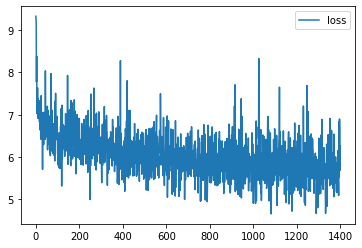

In [ ]:
from IPython.display import clear_output
history = []
epochs = 1
batch_size = 64
for i in range(len(text) // batch_size * epochs):
    batch = get_batch(text, batch_size)
    X = batch[:-1]
    y =  torch.tensor(tuple(map(word_to_id.get, batch[1:])))
    predicted = model(X)
    loss = F.nll_loss(predicted, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    history.append(loss.item())
    if (i + 1) % 50 == 0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

In [ ]:
def generate_sample(model, seed='реве', length=50, temperature=1.0):
      x = seed.split()
      out = model(x[:-1])
      # print(x[:-1])
      for i in range(length - len(seed)):
          out = model([x[-1]])
          p_next = F.softmax(out / temperature, dim=-1).data.numpy()[0]
          # p_next = out.data.view(-1).div(temperature).exp()
          # next_ix = torch.multinomial(p_next, 1)[0]
          # next_ix = p_next.argmax()
          next_ix = np.random.choice(len(words), p=p_next)
          # print(next_ix)
          x.append(words[next_ix])
      
      return (' '.join(x)).replace('<new>', '\n')

In [ ]:
print(generate_sample(model, 'реве та', temperature=1))

реве та рогнідою 
 каже 
 в єдиного друга 
 танцювали а 
 город рука 
 дніпрі спущу зза а не розмовлять 
 
 
 на 
 тяжко 
 покусає же всі а те скрутять за господине чуєш старий їх краю 
 
 знову б
